In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [67]:
train_path = "/Users/songchen/Desktop/stats_101c/project/SkinCancerTrain.csv"
test_path  = "/Users/songchen/Desktop/stats_101c/project/SkinCancerTestNoY.csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

Inspect shapes, columns, data types, missing values

In [68]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (50000, 51)
Test shape: (20000, 50)


In [69]:
target_col = "Cancer"

# drop target from predictors in train
X_train = train.drop(columns=[target_col])
y_train = train[target_col]

# basic type-based split
numeric_cols = X_train.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=["number"]).columns.tolist()

print("Number of numeric predictors:", len(numeric_cols))
print(numeric_cols)
print("\nNumber of categorical predictors:", len(categorical_cols))
print(categorical_cols)

Number of numeric predictors: 21
['Unnamed: 0', 'age', 'income', 'avg_daily_uv', 'sunscreen_spf', 'outdoor_job', 'frequency_doctor_visits_per_year', 'alcohol_drinks_per_week', 'BMI', 'distance_from_beach_km', 'residence_lat', 'residence_lon', 'lesion_size_mm', 'number_of_lesions', 'exercise_freq_per_week', 'commute_minutes', 'sunburns_last_year', 'zip_code_last_digit', 'desk_height_cm', 'years_lived_at_address', 'monthly_screen_time_minutes']

Number of categorical predictors: 29
['gender', 'skin_tone', 'education', 'urban_rural', 'occupation', 'sunscreen_freq', 'sunscreen_type', 'sunscreen_brand', 'hat_use', 'clothing_protection', 'tanning_bed_use', 'family_history', 'immunosuppressed', 'smoking_status', 'access_to_nude_beach', 'near_high_power_cables', 'lesion_color', 'lesion_location', 'pets', 'favorite_color', 'phone_brand', 'music_genre', 'skin_photosensitivity', 'vitamin_d_supplement', 'favorite_cuisine', 'uses_smartwatch', 'participates_outdoor_sports', 'uses_tanning_oil', 'pref

In [70]:
# missing counts and percentages per column in train
train_missing_count = train.isna().sum()
train_missing_pct = train_missing_count / len(train) * 100

train_missing_summary = (
    pd.DataFrame({
        "missing_count": train_missing_count,
        "missing_pct": train_missing_pct
    })
    .sort_values("missing_count", ascending=False)
)

print("Train missing values (count and %):")
print(train_missing_summary[train_missing_summary["missing_count"] > 0])

Train missing values (count and %):
                                  missing_count  missing_pct
family_history                            36077       72.154
pets                                      26950       53.900
vitamin_d_supplement                       4158        8.316
phone_brand                                4092        8.184
skin_tone                                  4091        8.182
sunscreen_spf                              4085        8.170
preferred_shoe_type                        4082        8.164
sunscreen_freq                             4075        8.150
residence_lat                              4074        8.148
commute_minutes                            4062        8.124
near_high_power_cables                     4061        8.122
income                                     4058        8.116
avg_daily_uv                               4054        8.108
lesion_location                            4049        8.098
distance_from_beach_km                     4045  

In [71]:
# missing counts and percentages per column in test
test_missing_count = test.isna().sum()
test_missing_pct = test_missing_count / len(test) * 100

test_missing_summary = (
    pd.DataFrame({
        "missing_count": test_missing_count,
        "missing_pct": test_missing_pct
    })
    .sort_values("missing_count", ascending=False)
)

print("\nTest missing values (count and %):")
print(test_missing_summary[test_missing_summary["missing_count"] > 0])



Test missing values (count and %):
                                  missing_count  missing_pct
family_history                            14490       72.450
pets                                      10670       53.350
residence_lon                              1694        8.470
phone_brand                                1677        8.385
preferred_shoe_type                        1662        8.310
uses_smartwatch                            1656        8.280
skin_tone                                  1655        8.275
smoking_status                             1648        8.240
near_high_power_cables                     1647        8.235
income                                     1647        8.235
lesion_color                               1634        8.170
skin_photosensitivity                      1624        8.120
zip_code_last_digit                        1621        8.105
BMI                                        1620        8.100
access_to_nude_beach                       1620  

In [72]:
train["Cancer"].value_counts(), train["Cancer"].value_counts(normalize=True)

(Cancer
 Malignant    26132
 Benign       23868
 Name: count, dtype: int64,
 Cancer
 Malignant    0.52264
 Benign       0.47736
 Name: proportion, dtype: float64)

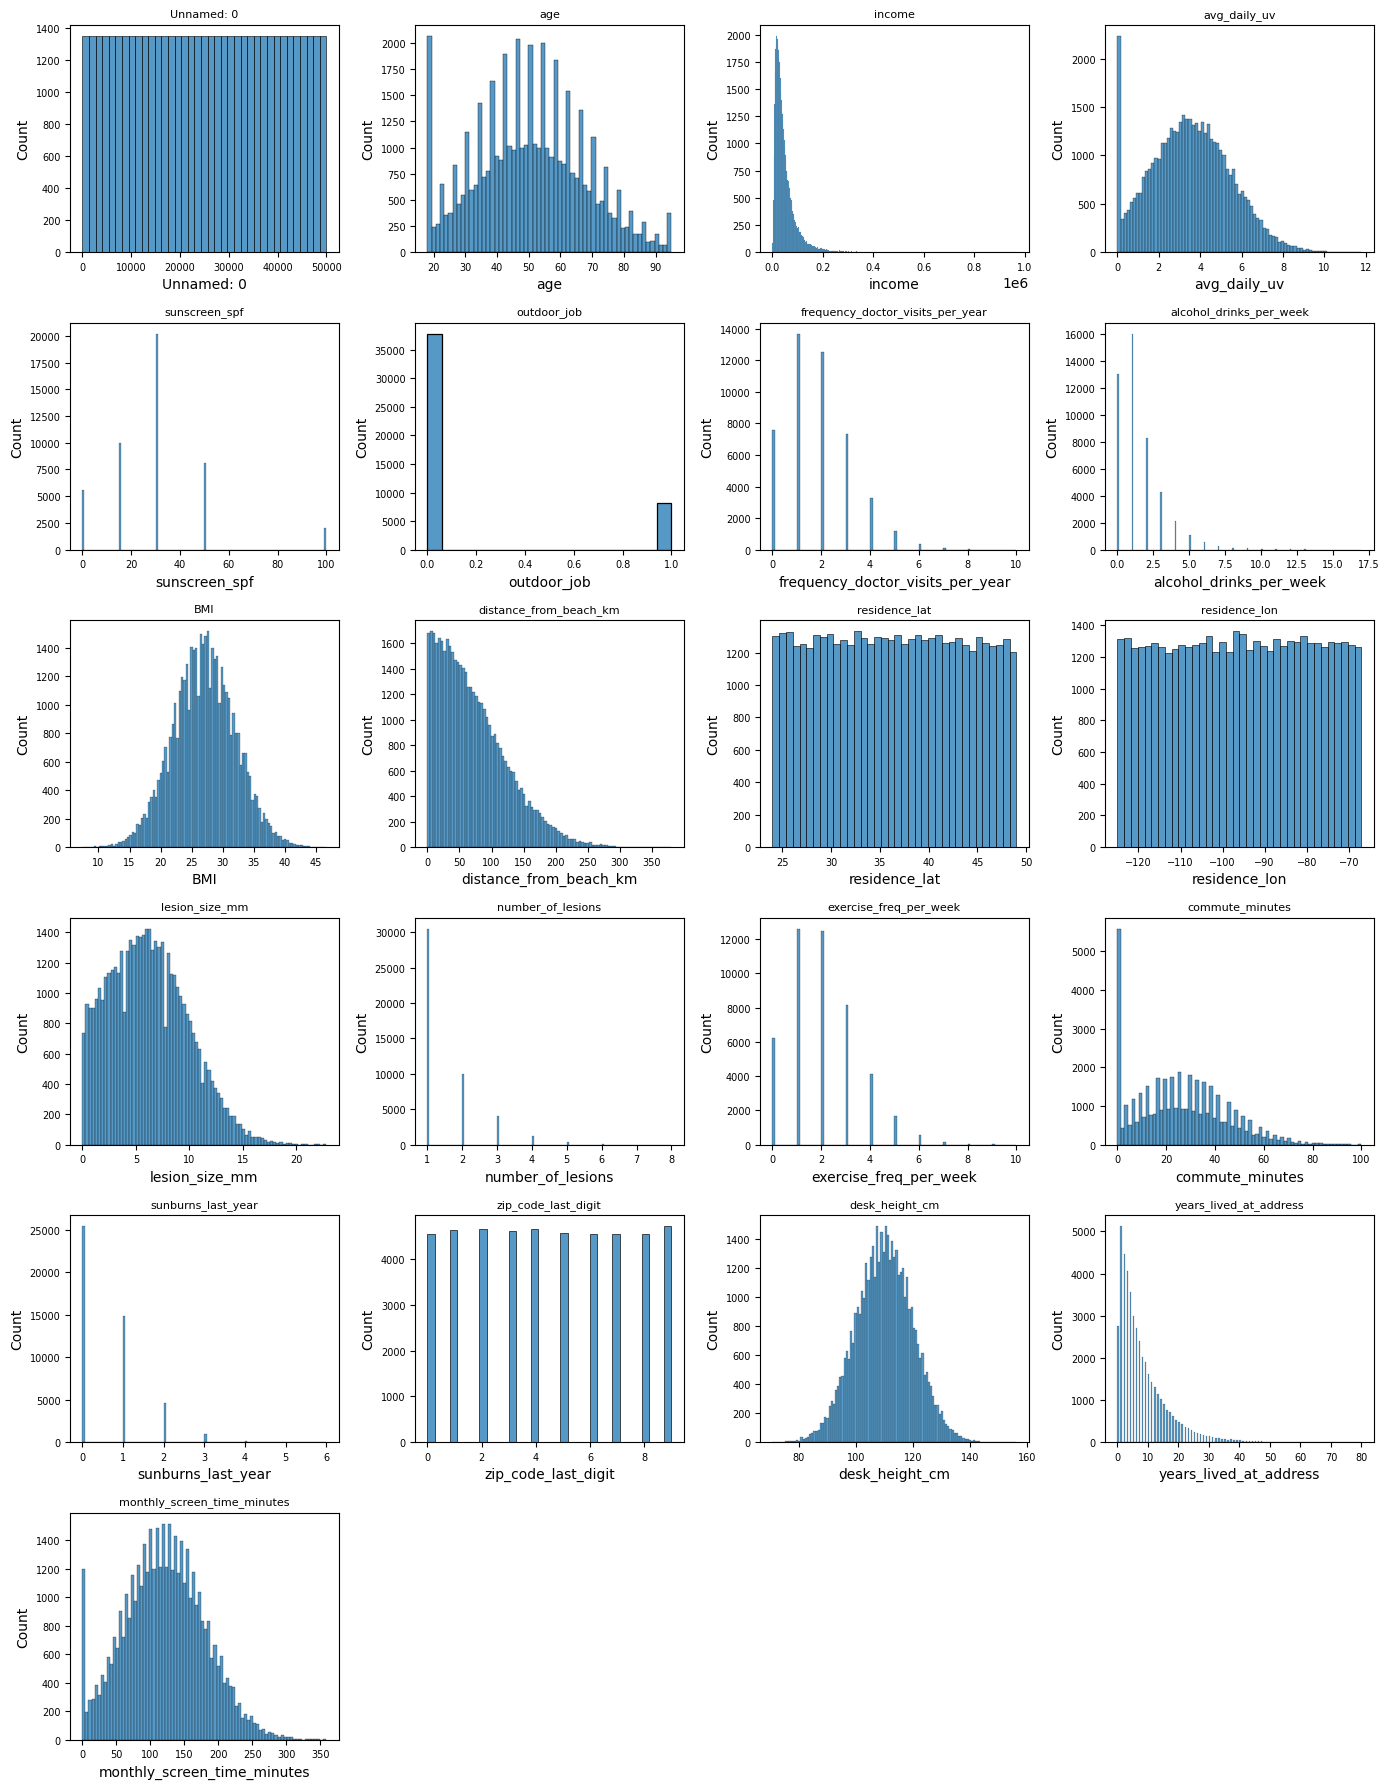

In [73]:
import math

cols_to_plot = numeric_cols 
n = len(cols_to_plot)
n_cols = 4                    
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 3*n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    ax = axes[i]
    sns.histplot(train[col], kde=False, ax=ax)
    ax.set_title(col, fontsize=8)
    ax.tick_params(axis='x', labelsize=7)
    ax.tick_params(axis='y', labelsize=7)

# hide any unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

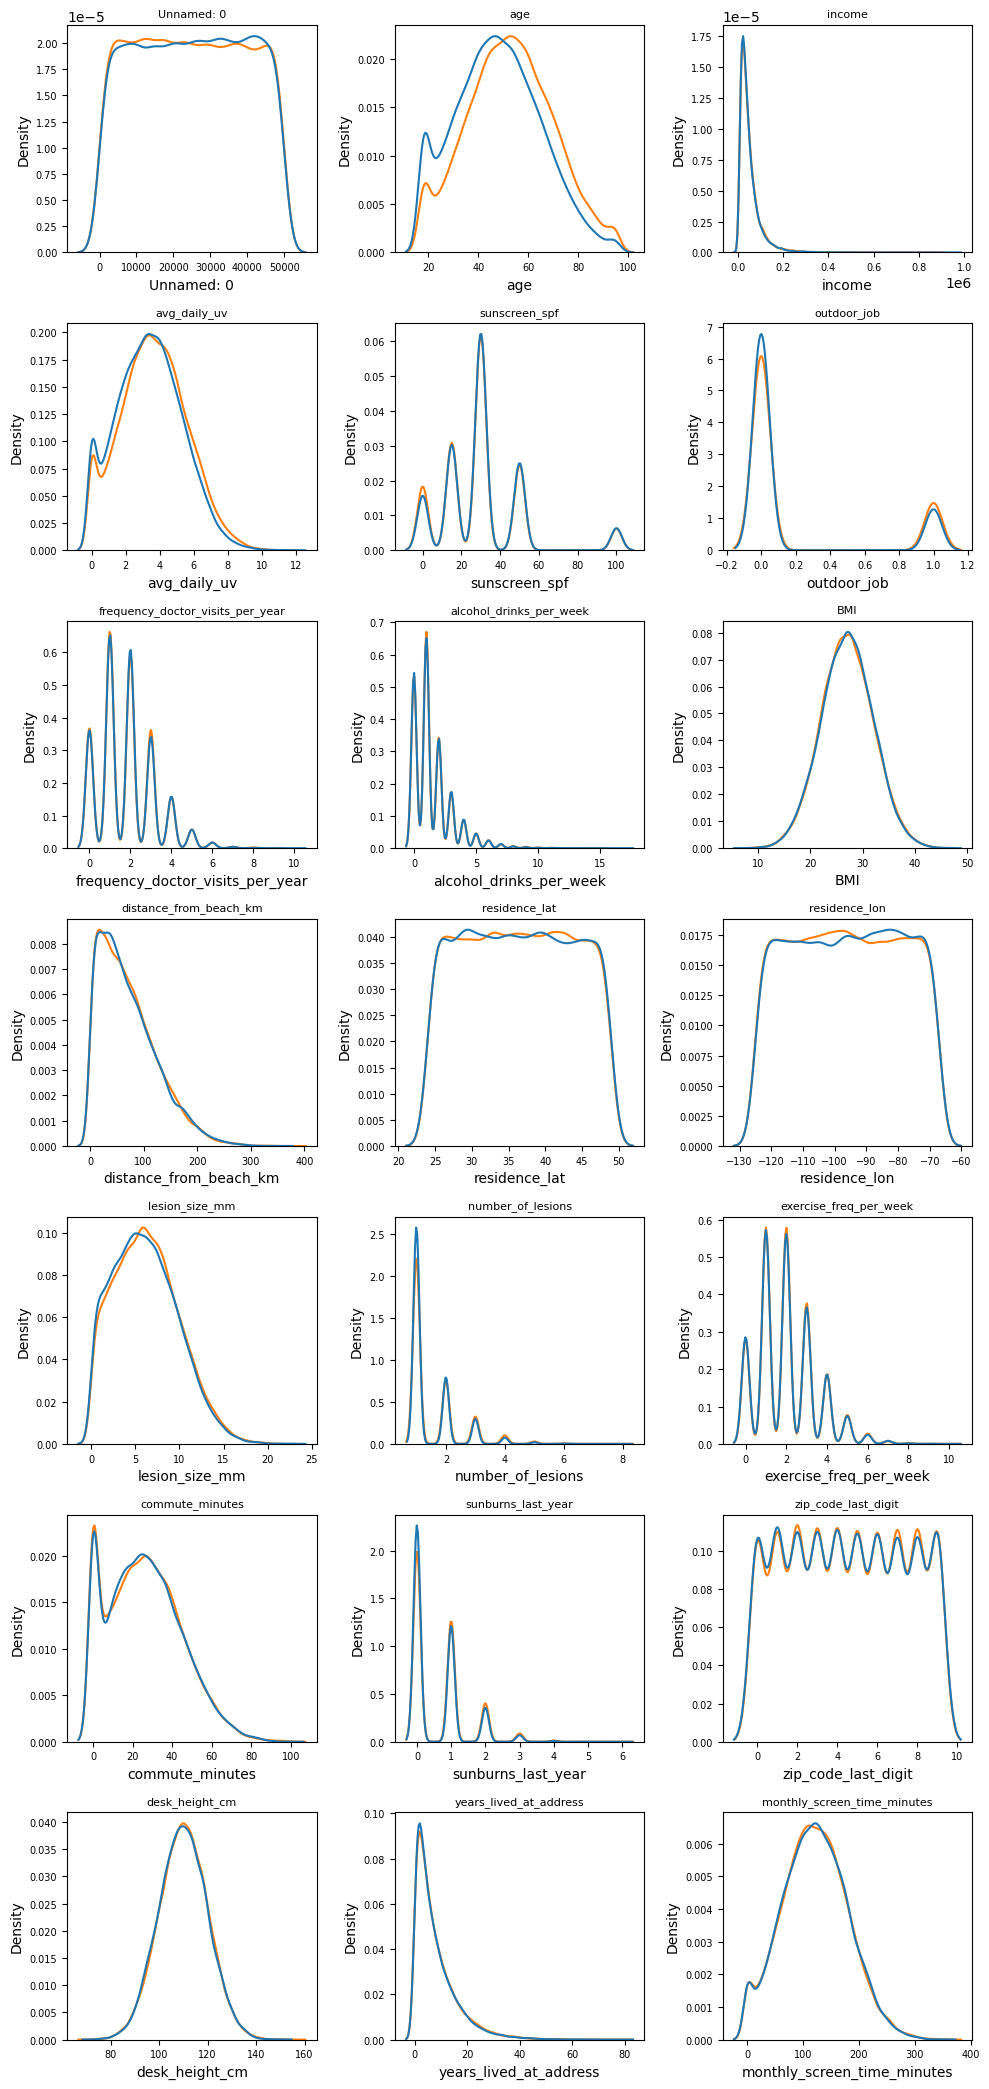

In [74]:
n = len(cols_to_plot)
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3*n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    ax = axes[i]
    sns.kdeplot(data=train, x=col, hue="Cancer", common_norm=False, ax=ax, legend=False)
    ax.set_title(col, fontsize=8)
    ax.tick_params(axis='x', labelsize=7)
    ax.tick_params(axis='y', labelsize=7)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [75]:
# treat missing as "Unknown" in both train and test
for df in (train, test):
    df["family_history"] = df["family_history"].fillna("Unknown")

In [76]:
df["family_history"].unique()


array(['1st-degree', 'Unknown', '2nd-degree'], dtype=object)

In [77]:
df["family_history"].value_counts()


family_history
Unknown       15236
1st-degree     3250
2nd-degree     1514
Name: count, dtype: int64

In [78]:
# recompute X_train after modifying train
X_train = train.drop(columns=[target_col])

num_medians = X_train[numeric_cols].median()

train[numeric_cols] = X_train[numeric_cols].fillna(num_medians)
test[numeric_cols]  = test[numeric_cols].fillna(num_medians)

In [79]:
# optional: exclude family_history since we already set Unknown
cat_cols_for_mode = [c for c in categorical_cols if c != "family_history"]

for col in cat_cols_for_mode:
    mode_val = train[col].mode(dropna=True)[0]
    train[col] = train[col].fillna(mode_val)
    test[col]  = test[col].fillna(mode_val)

In [80]:
from sklearn.preprocessing import OneHotEncoder

# prepare data for encoding
X_train = train.drop(columns=[target_col])
X_test = test.copy()

# one-hot encode categoricals
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_cat_encoded = pd.DataFrame(
    ohe.fit_transform(X_train[categorical_cols]),
    columns=ohe.get_feature_names_out(categorical_cols),
    index=X_train.index
)
X_test_cat_encoded = pd.DataFrame(
    ohe.transform(X_test[categorical_cols]),
    columns=ohe.get_feature_names_out(categorical_cols),
    index=X_test.index
)

# combine numeric + encoded categoricals
X_train_processed = pd.concat([X_train[numeric_cols], X_train_cat_encoded], axis=1)
X_test_processed = pd.concat([X_test[numeric_cols], X_test_cat_encoded], axis=1)

Absolute correlation with Cancer:
age                                0.135508
family_history_Unknown             0.097360
avg_daily_uv                       0.059947
immunosuppressed_Yes               0.059790
number_of_lesions                  0.051292
skin_tone_Very Fair                0.051093
skin_tone_Fair                     0.048868
sunburns_last_year                 0.045711
sunscreen_freq_Often               0.045314
outdoor_job                        0.045125
occupation_Outdoor                 0.042005
sunscreen_freq_Rarely              0.038866
skin_tone_Dark                     0.031593
skin_tone_Olive                    0.031021
tanning_bed_use_Often              0.030872
skin_photosensitivity_Low          0.029281
clothing_protection_Low            0.028312
sunscreen_freq_Never               0.027650
hat_use_Never                      0.024630
lesion_size_mm                     0.022348
sunscreen_freq_Sometimes           0.020148
skin_tone_Medium                   0.01928

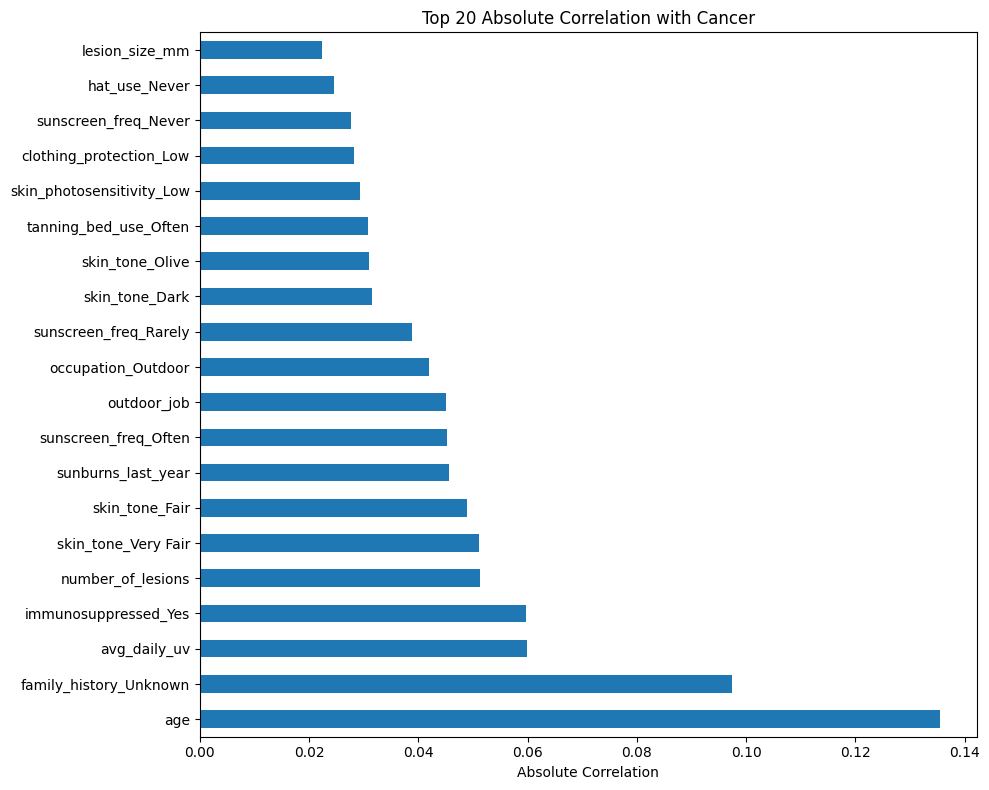

In [81]:
# Create binary target for correlation
y_train_binary = (y_train == "Malignant").astype(int)

# Combine features with target for correlation
corr_df = X_train_processed.copy()
corr_df["Cancer_binary"] = y_train_binary

# Compute correlations
correlations = corr_df.corr()["Cancer_binary"].sort_values(ascending=False)

# Remove the self-correlation
correlations = correlations.drop("Cancer_binary")

print("Absolute correlation with Cancer:")
print(correlations.abs().sort_values(ascending=False).head(50))

# Plot top correlations
plt.figure(figsize=(10, 8))
top_corr = correlations.abs().sort_values(ascending=False).head(20)
top_corr.plot(kind='barh')
plt.title("Top 20 Absolute Correlation with Cancer")
plt.xlabel("Absolute Correlation")
plt.tight_layout()
plt.show()

Top 20 features by Random Forest importance:
                        feature  importance
1                           age    0.124724
60       family_history_Unknown    0.052334
3                  avg_daily_uv    0.051260
12               lesion_size_mm    0.034799
10                residence_lat    0.034559
0                    Unnamed: 0    0.034449
18               desk_height_cm    0.033277
2                        income    0.032750
9        distance_from_beach_km    0.032032
11                residence_lon    0.031862
8                           BMI    0.030578
20  monthly_screen_time_minutes    0.029702
15              commute_minutes    0.025130
19       years_lived_at_address    0.023197
61         immunosuppressed_Yes    0.021434
13            number_of_lesions    0.016699
16           sunburns_last_year    0.015697
17          zip_code_last_digit    0.015669
27          skin_tone_Very Fair    0.014821
24               skin_tone_Fair    0.014689


<Figure size 1000x1200 with 0 Axes>

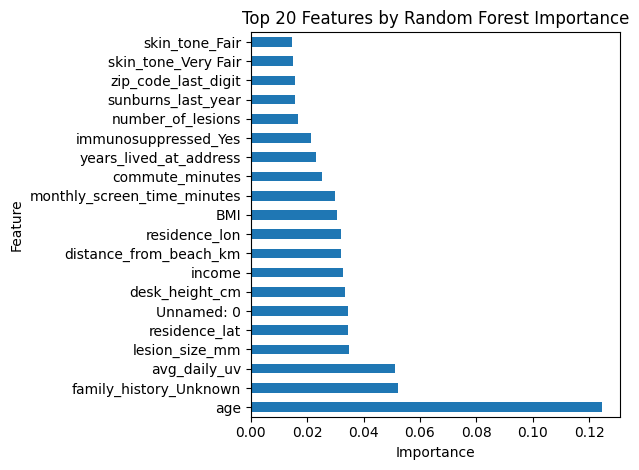


Validation Accuracy: 0.5833
Validation ROC-AUC: 0.6174


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split train into train/validation for evaluation
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_processed, y_train_binary, 
    test_size=0.2, random_state=42, stratify=y_train_binary
)

# Fit simple random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf.fit(X_tr, y_tr)

# Get feature importances
feature_importance = pd.DataFrame({
    'feature': X_train_processed.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 20 features by Random Forest importance:")
print(feature_importance.head(20))

# Plot top importances
plt.figure(figsize=(10, 12))
top_imp = feature_importance.head(20)
top_imp.plot(x='feature', y='importance', kind='barh', legend=False)
plt.title("Top 20 Features by Random Forest Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Quick validation score
from sklearn.metrics import accuracy_score, roc_auc_score
y_val_pred = rf.predict(X_val)
y_val_proba = rf.predict_proba(X_val)[:, 1]

print(f"\nValidation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Validation ROC-AUC: {roc_auc_score(y_val, y_val_proba):.4f}")

Testing NUMERIC predictors...



Testing CATEGORICAL predictors...

HYPOTHESIS TEST RESULTS

Total features tested: 50
Features with p < 0.05: 18
Features with p < 0.01: 16
Features with p < 0.001: 16

Top 20 features by p-value (most significant):
               feature        type       test       p_value  statistic
                   age     numeric     t-test 1.611869e-203 -30.581998
        family_history categorical Chi-square 1.563196e-116 533.306277
             skin_tone categorical Chi-square  4.691772e-80 380.513499
        sunscreen_freq categorical Chi-square  1.960773e-45 215.261893
          avg_daily_uv     numeric     t-test  4.848122e-41 -13.428533
      immunosuppressed categorical Chi-square  1.246859e-40 178.120435
     number_of_lesions     numeric     t-test  1.733392e-30 -11.484024
    sunburns_last_year     numeric     t-test  1.511830e-24 -10.231703
           outdoor_job     numeric     t-test  5.799722e-24 -10.100423
            occupation categorical Chi-square  2.408232e-19 100.085578
  

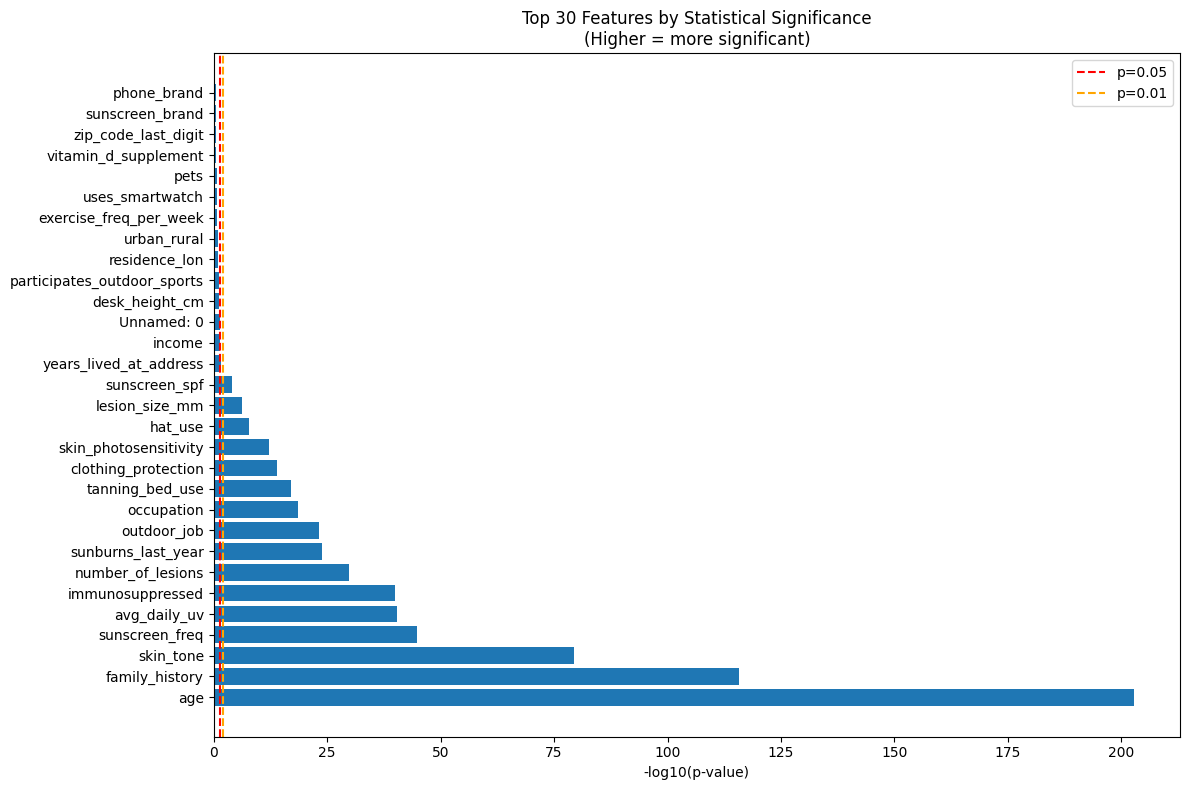

In [83]:
from scipy import stats
from scipy.stats import chi2_contingency

# Binary target
y_binary = (y_train == "Malignant").astype(int)

results = []

# 1. Test NUMERIC predictors: Independent samples t-test
print("Testing NUMERIC predictors...")
for col in numeric_cols:
    benign_vals = train.loc[y_train == "Benign", col].dropna()
    malignant_vals = train.loc[y_train == "Malignant", col].dropna()
    
    if len(benign_vals) > 1 and len(malignant_vals) > 1:
        # Independent samples t-test
        stat, p_value = stats.ttest_ind(benign_vals, malignant_vals)
        results.append({
            'feature': col,
            'type': 'numeric',
            'test': 't-test',
            'p_value': p_value,
            'statistic': stat
        })

# 2. Test CATEGORICAL predictors: Chi-square test
print("\nTesting CATEGORICAL predictors...")
for col in categorical_cols:
    # Create contingency table
    contingency = pd.crosstab(train[col], y_train)
    
    if contingency.shape[0] > 1 and contingency.shape[1] > 1:
        # Chi-square test
        chi2, p_value, dof, expected = chi2_contingency(contingency)
        results.append({
            'feature': col,
            'type': 'categorical',
            'test': 'Chi-square',
            'p_value': p_value,
            'statistic': chi2
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('p_value')

print("\n" + "="*60)
print("HYPOTHESIS TEST RESULTS")
print("="*60)
print(f"\nTotal features tested: {len(results_df)}")
print(f"Features with p < 0.05: {(results_df['p_value'] < 0.05).sum()}")
print(f"Features with p < 0.01: {(results_df['p_value'] < 0.01).sum()}")
print(f"Features with p < 0.001: {(results_df['p_value'] < 0.001).sum()}")

print("\nTop 20 features by p-value (most significant):")
print(results_df.head(20).to_string(index=False))

print("\nBottom 20 features by p-value (least significant):")
print(results_df.tail(20).to_string(index=False))

# Visualize p-values
plt.figure(figsize=(12, 8))
top_30 = results_df.head(30)
plt.barh(range(len(top_30)), -np.log10(top_30['p_value']))
plt.yticks(range(len(top_30)), top_30['feature'])
plt.xlabel('-log10(p-value)')
plt.title('Top 30 Features by Statistical Significance\n(Higher = more significant)')
plt.axvline(x=-np.log10(0.05), color='r', linestyle='--', label='p=0.05')
plt.axvline(x=-np.log10(0.01), color='orange', linestyle='--', label='p=0.01')
plt.legend()
plt.tight_layout()
plt.show()

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 1. Prepare your data (you should already have these)
# X_train_processed, X_test_processed, y_train_binary

# 2. Split train into train/validation (optional, for evaluation)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_processed, y_train_binary, 
    test_size=0.2, random_state=42, stratify=y_train_binary
)

# 3. Fit your model on the FULL training data (for final submission)
final_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
final_model.fit(X_train_processed, y_train_binary)  # Train on ALL training data

# 4. (Optional) Evaluate on validation set
y_val_pred = final_model.predict(X_val)
y_val_proba = final_model.predict_proba(X_val)[:, 1]

from sklearn.metrics import accuracy_score, roc_auc_score
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Validation ROC-AUC: {roc_auc_score(y_val, y_val_proba):.4f}")

# 5. Make predictions on TEST set
test_predictions = final_model.predict(X_test_processed)

# 6. Convert binary predictions (0/1) to "Benign"/"Malignant"
test_predictions_labels = ["Malignant" if pred == 1 else "Benign" for pred in test_predictions]

# 7. Get IDs from test set
# Check what ID column exists - likely "Unnamed: 0"
test_ids = test["Unnamed: 0"].values

# 8. Create submission DataFrame
submission = pd.DataFrame({
    "ID": test_ids,
    "Cancer": test_predictions_labels
})

Validation Accuracy: 0.6886
Validation ROC-AUC: 0.7800


In [85]:
# 9. Save to CSV
submission.to_csv("SkinCancerSubmission.csv", index=False)

print("\nSubmission file saved!")
print(f"Shape: {submission.shape}")
print("\nFirst few rows:")
print(submission.head(10))
print("\nValue counts:")
print(submission["Cancer"].value_counts())


Submission file saved!
Shape: (20000, 2)

First few rows:
   ID     Cancer
0   1  Malignant
1   2     Benign
2   3  Malignant
3   4  Malignant
4   5     Benign
5   6     Benign
6   7  Malignant
7   8     Benign
8   9     Benign
9  10     Benign

Value counts:
Cancer
Malignant    12907
Benign        7093
Name: count, dtype: int64


In [86]:
# Save processed training data (with target)
train_processed_full = X_train_processed.copy()
train_processed_full["Cancer"] = y_train  # or y_train_binary if you prefer binary
train_processed_full.to_csv("SkinCancerTrain_processed.csv", index=False)

# Save processed test data
X_test_processed.to_csv("SkinCancerTest_processed.csv", index=False)

print("Processed datasets saved!")
print(f"Train shape: {train_processed_full.shape}")
print(f"Test shape: {X_test_processed.shape}")

Processed datasets saved!
Train shape: (50000, 107)
Test shape: (20000, 106)


In [87]:
df1 = pd.read_csv("SkinCancerTrain_processed.csv")
df2 = pd.read_csv("SkinCancerTest_processed.csv")
df1.head(5)
df2.head(5)   
df1.shape
df2.shape     


(20000, 106)